# $$\text{DATA ANALYSIS}$$

---

## $$\text{Intro and Imports}$$

Exploratory data analysis on the processed dataset to understand the data to uncover insights trough **analysis and visualizations**.

#### Process:
- Exploratory Data Analysis
- Mapping 
- Time Series
- Corelation and Relationships

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import plugins

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
uber = pd.read_csv('../data/processed_data.csv')

---

## $$\text{Data Overview}$$

In [93]:
uber.head()

fare_amount  distance_km  pickup_longitude  pickup_latitude  \
0          7.5        1.683        -73.999817        40.738354   
1          7.7        2.458        -73.994355        40.728225   
2         12.9        5.036        -74.005043        40.740770   
3          5.3        1.662        -73.976124        40.790844   
4         16.0        4.475        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  year  month  day  \
0         -73.999512         40.723217                1  2015      5    7   
1         -73.994710         40.750325                1  2009      7   17   
2         -73.962565         40.772647                1  2009      8   24   
3         -73.965316         40.803349                3  2009      6   26   
4         -73.973082         40.761247                5  2014      8   28   

   hour  
0    19  
1    20  
2    21  
3     8  
4    17

In [94]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159315 entries, 0 to 159314
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        159315 non-null  float64
 1   distance_km        159315 non-null  float64
 2   pickup_longitude   159315 non-null  float64
 3   pickup_latitude    159315 non-null  float64
 4   dropoff_longitude  159315 non-null  float64
 5   dropoff_latitude   159315 non-null  float64
 6   passenger_count    159315 non-null  int64  
 7   year               159315 non-null  int64  
 8   month              159315 non-null  int64  
 9   day                159315 non-null  int64  
 10  hour               159315 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 13.4 MB


---

## $$\text{Exploratory Data Analysis}$$

In [95]:
#defaults
plt.rcParams['figure.figsize'] = [20, 5]

In [96]:
sns.set_theme(palette='coolwarm', style='dark', font='DejaVu Sans')

Text(0.5, 1.0, 'Distribution of Price')

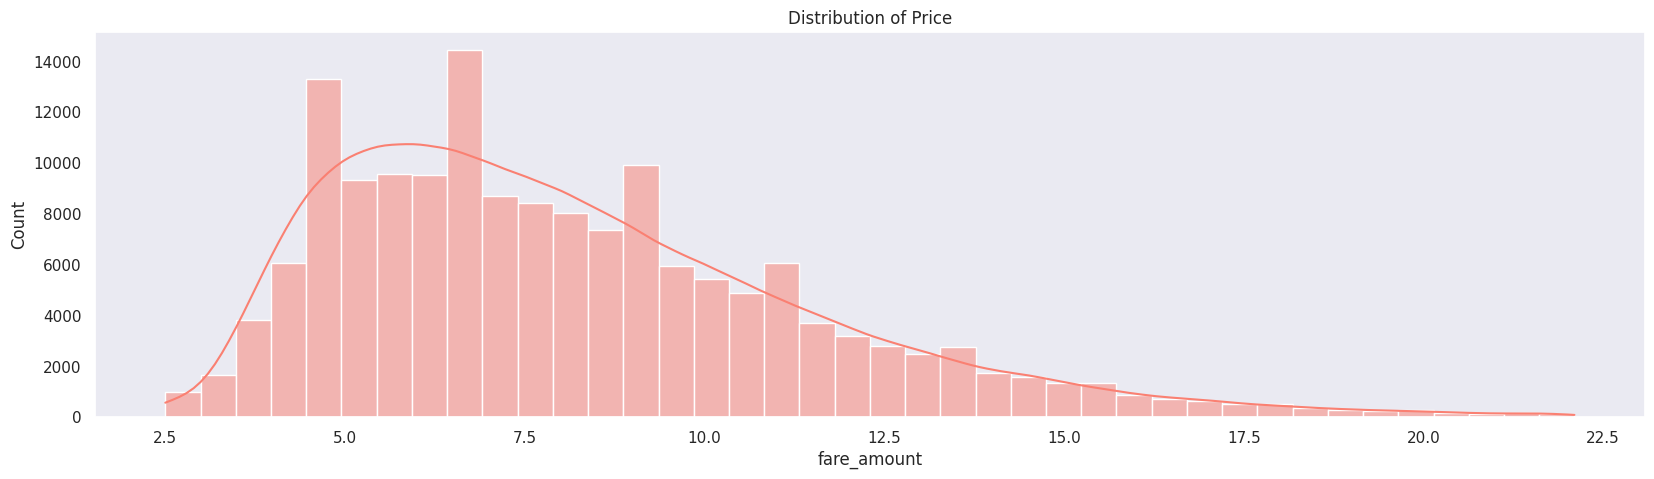

In [97]:
sns.histplot(uber, x='fare_amount', kde=True, bins=40, color='Salmon')
plt.title('Distribution of Price')

Text(0.5, 1.0, 'Distribution of Distance')

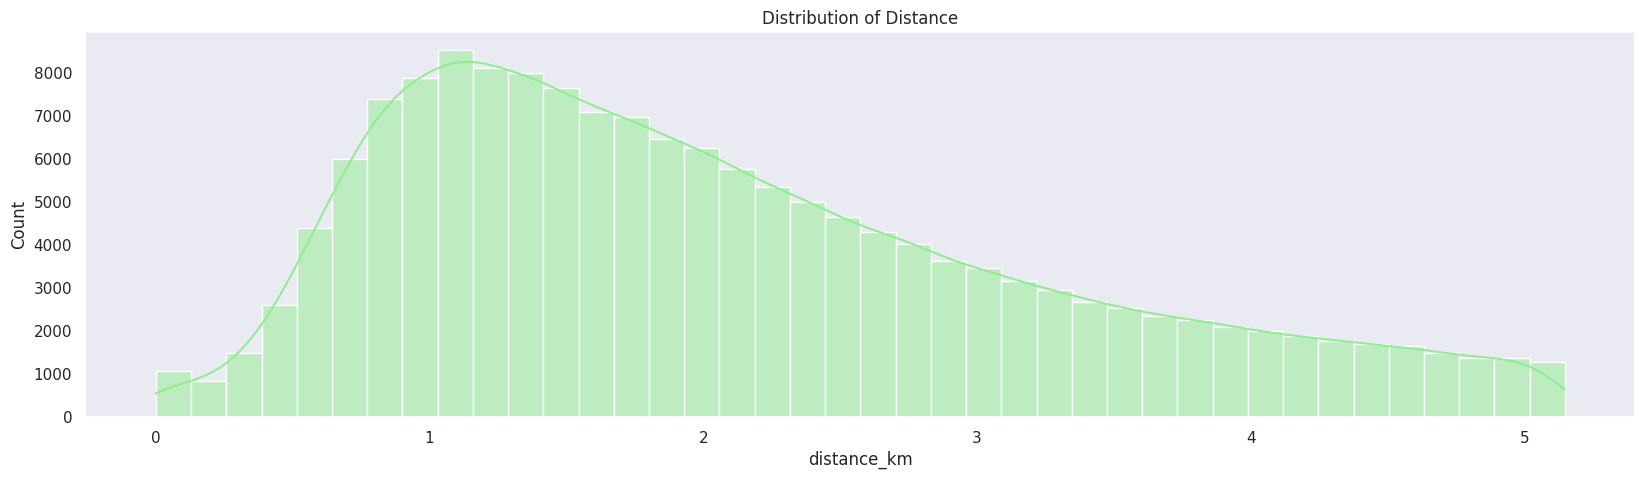

In [98]:
sns.histplot(uber, x='distance_km', kde=True, bins=40, color='lightgreen')
plt.title('Distribution of Distance')

Text(0.5, 1.0, 'Distribution of Passengers')

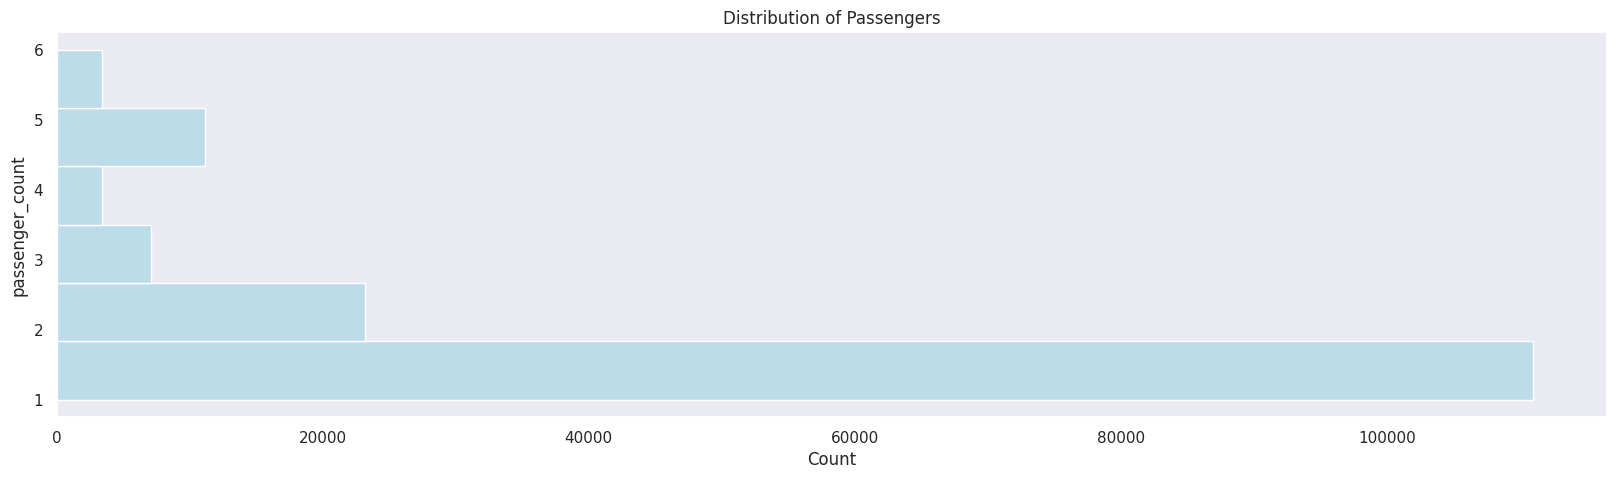

In [99]:
max_passengers = uber['passenger_count'].max()
sns.histplot(uber, y='passenger_count', kde=False, color='lightblue', 
             bins=max_passengers)
plt.title('Distribution of Passengers')

Distance, and fare amout follow a similar distribution, we'll further explore this with heat and corelation maps

---

## $$\text{Mapping}$$
Visualize the geographical distribution of Uber rides using heatmaps overlaid on real maps. This geographical analysis helps in understanding spatial trends and potential areas of high demand.

For the center of the map, we'll use the mean of the pickups, and plot the pickups around that

From this we see that the large majority of points are around NewYork

In [ ]:
coord = uber[['pickup_latitude', 'pickup_longitude']].values.tolist()
    
map = folium.Map(location=[uber['pickup_latitude'].mean(), uber['pickup_longitude'].mean()], tiles='Cartodb Positron')
# OpenStreetMap, Cartodb Positron, Cartodb dark_matter

map.add_child(plugins.HeatMap(coord))

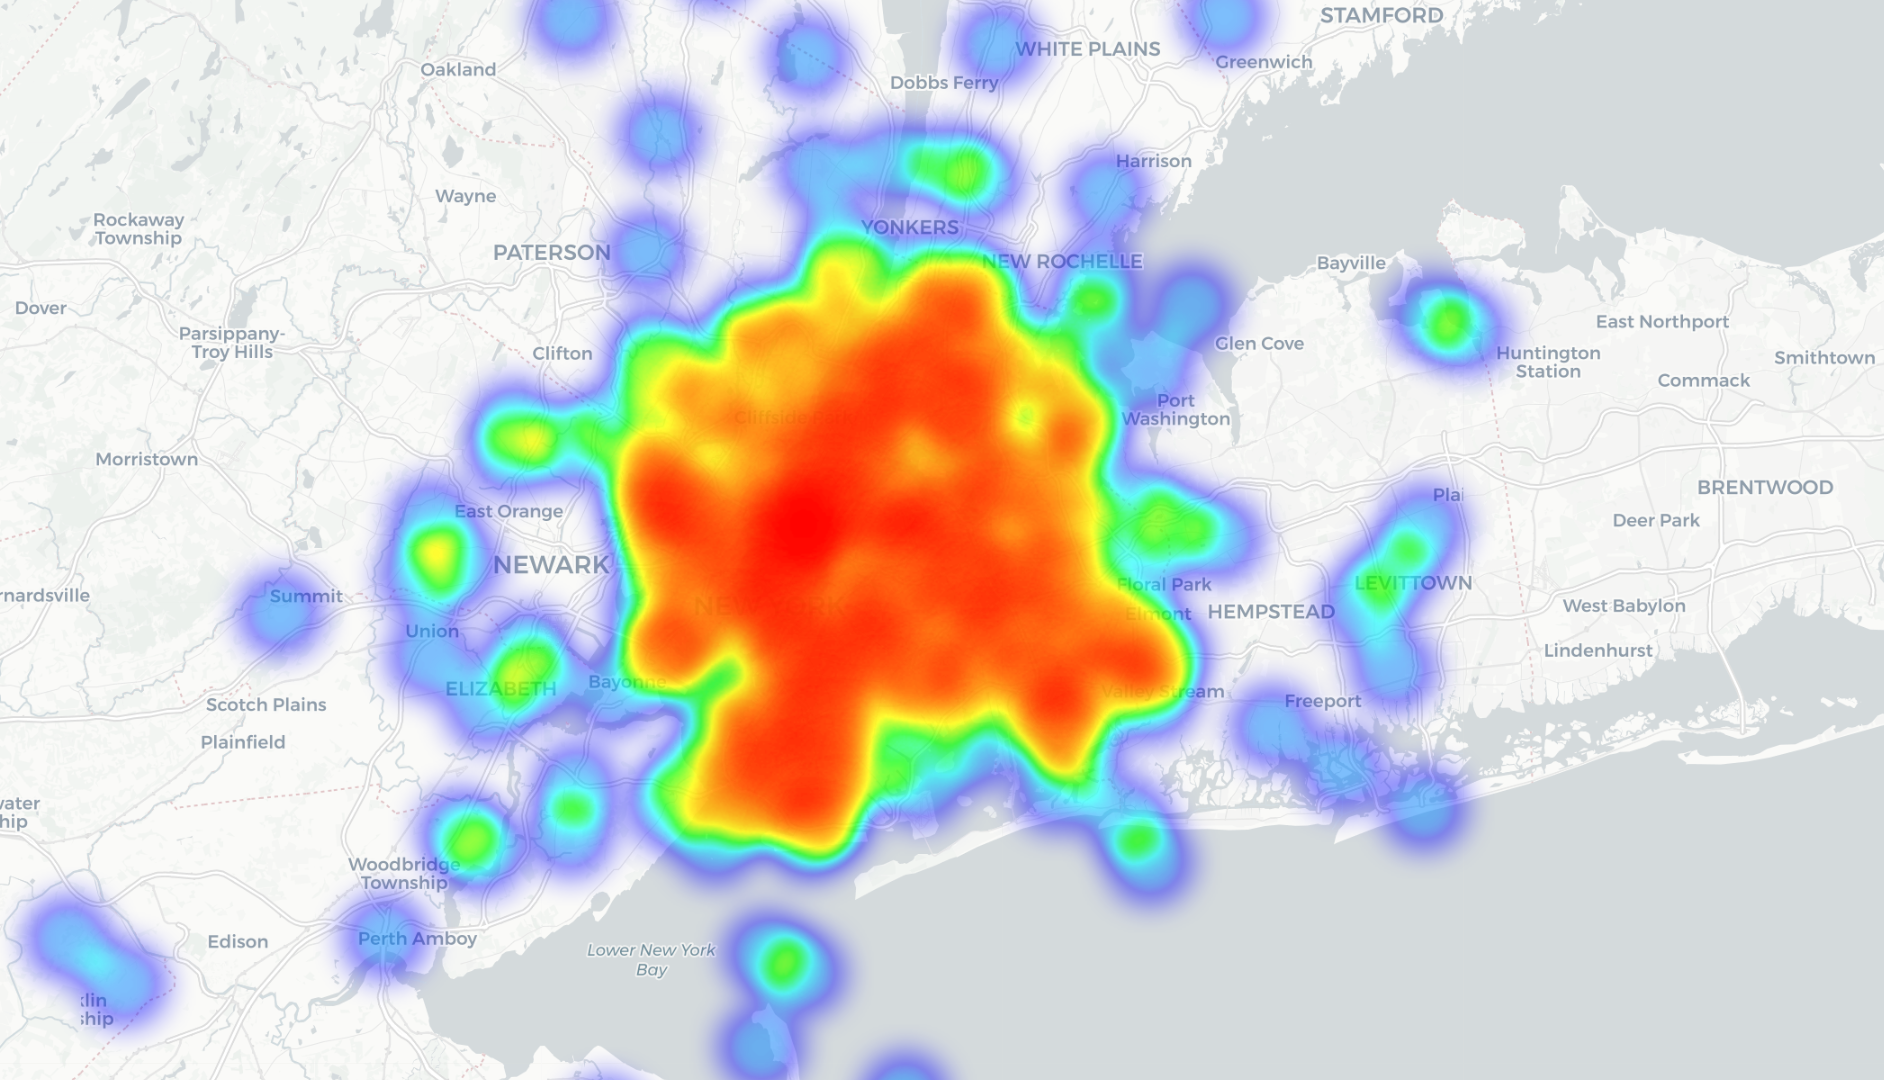

---

## $$\text{Time Series Analysis}$$
Delve into the temporal trends of Uber ride data across various time granularities: year, month, day, and hour. Analyzing trends over time.

In [101]:
uber.head()

fare_amount  distance_km  pickup_longitude  pickup_latitude  \
0          7.5        1.683        -73.999817        40.738354   
1          7.7        2.458        -73.994355        40.728225   
2         12.9        5.036        -74.005043        40.740770   
3          5.3        1.662        -73.976124        40.790844   
4         16.0        4.475        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  year  month  day  \
0         -73.999512         40.723217                1  2015      5    7   
1         -73.994710         40.750325                1  2009      7   17   
2         -73.962565         40.772647                1  2009      8   24   
3         -73.965316         40.803349                3  2009      6   26   
4         -73.973082         40.761247                5  2014      8   28   

   hour  
0    19  
1    20  
2    21  
3     8  
4    17

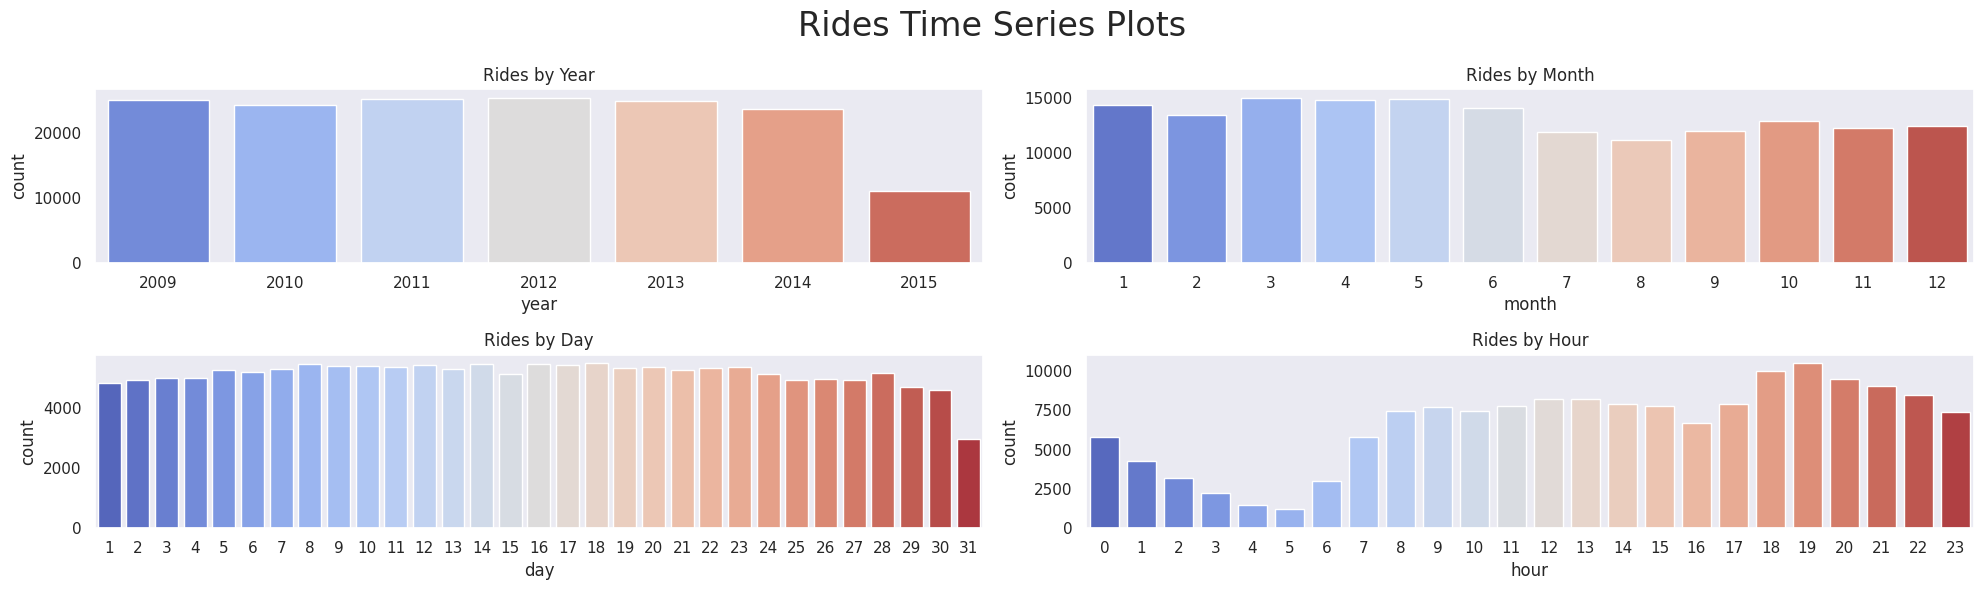

In [102]:
fig, ax = plt.subplots(2,2, figsize=(20, 6))

fig.suptitle('Rides Time Series Plots', fontsize=24)

sns.countplot(ax=ax[0,0], data=uber, x='year', palette='coolwarm')
sns.countplot(ax=ax[0,1], data=uber, x='month', palette='coolwarm')
sns.countplot(ax=ax[1,0], data=uber, x='day', palette='coolwarm')
sns.countplot(ax=ax[1,1], data=uber, x='hour', palette='coolwarm')

ax[0, 0].set_title('Rides by Year')
ax[0, 1].set_title('Rides by Month')
ax[1, 0].set_title('Rides by Day')
ax[1, 1].set_title('Rides by Hour')

plt.tight_layout()

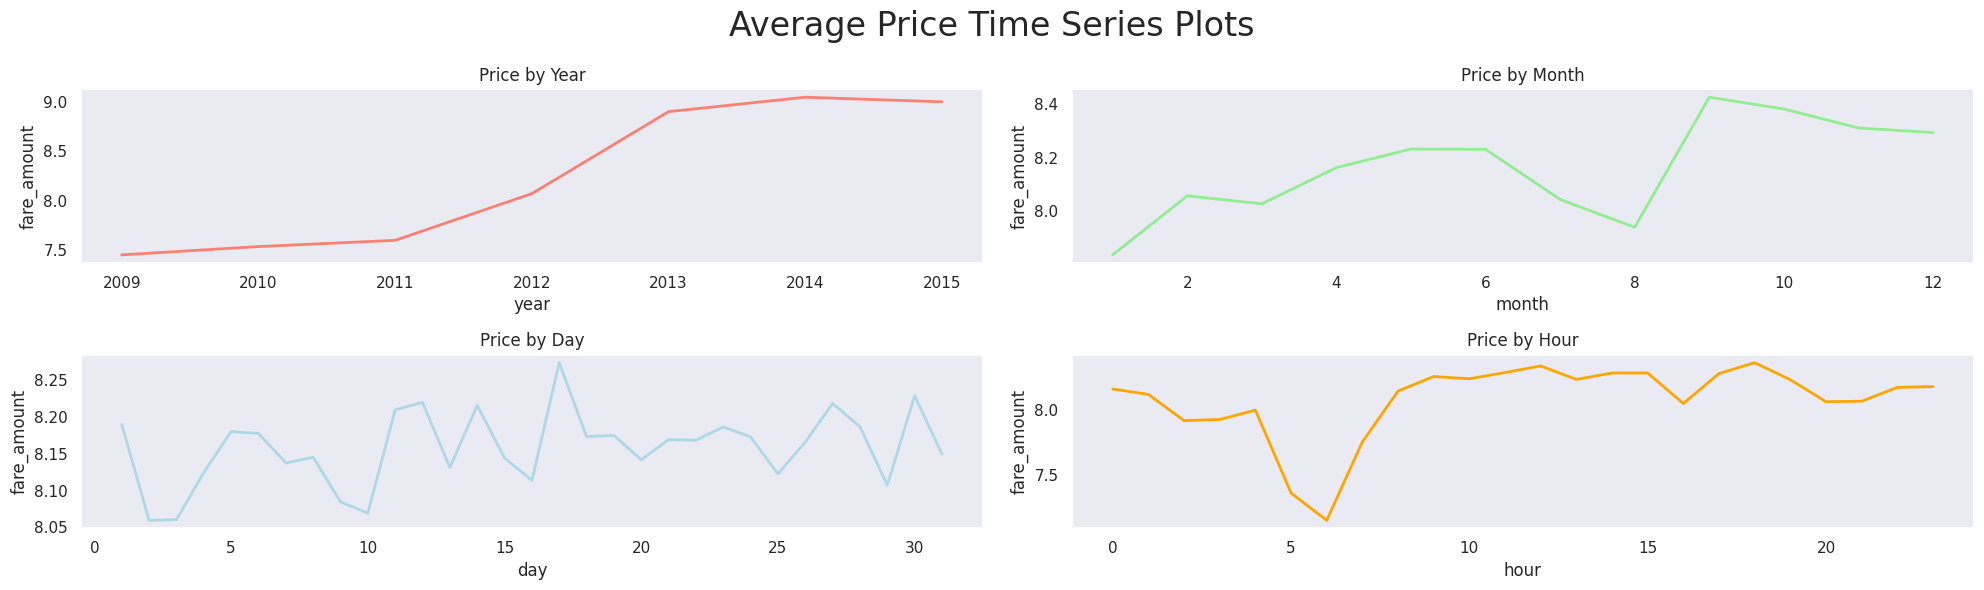

In [103]:
fig, ax = plt.subplots(2,2, figsize=(20, 6))

fig.suptitle('Average Price Time Series Plots', fontsize=24)

#grouping by is significatly faster than splitting by x, y and setting estimator to sum
sns.lineplot(ax=ax[0,0], data=uber.groupby(['year'])['fare_amount'].mean(), color='salmon', linewidth=2)
sns.lineplot(ax=ax[0,1], data=uber.groupby(['month'])['fare_amount'].mean(), color='lightgreen', linewidth=2)
sns.lineplot(ax=ax[1,0], data=uber.groupby(['day'])['fare_amount'].mean(), color='lightblue', linewidth=2)
sns.lineplot(ax=ax[1,1], data=uber.groupby(['hour'])['fare_amount'].mean(), color='orange', linewidth=2)

ax[0, 0].set_title('Price by Year')
ax[0, 1].set_title('Price by Month')
ax[1, 0].set_title('Price by Day')
ax[1, 1].set_title('Price by Hour')

plt.tight_layout()

---

## $$\text{Corelation and Relationships}$$
Relationships between various factors influencing Uber ride costs. Using heatmaps, scatter plots, and other visualization techniques to identify correlations and patterns in the data.

In [104]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159315 entries, 0 to 159314
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        159315 non-null  float64
 1   distance_km        159315 non-null  float64
 2   pickup_longitude   159315 non-null  float64
 3   pickup_latitude    159315 non-null  float64
 4   dropoff_longitude  159315 non-null  float64
 5   dropoff_latitude   159315 non-null  float64
 6   passenger_count    159315 non-null  int64  
 7   year               159315 non-null  int64  
 8   month              159315 non-null  int64  
 9   day                159315 non-null  int64  
 10  hour               159315 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 13.4 MB


Turn time and passenger columns individuals to see how different passengers affect different fields

In [105]:
dummy_passenger = pd.get_dummies(uber['passenger_count'], prefix='passenger')

In [106]:
dummy_passenger.columns

Index(['passenger_1', 'passenger_2', 'passenger_3', 'passenger_4',
       'passenger_5', 'passenger_6'],
      dtype='object')

corelation map, to be used for the heatmap, using only the numerical fields

In [107]:
#columns selection
uber_corr = pd.concat([uber.drop(columns=(['passenger_count'])), dummy_passenger], axis=1)

In [108]:
uber_corr = uber_corr.corr()
uber_corr.columns

Index(['fare_amount', 'distance_km', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'year', 'month', 'day', 'hour',
       'passenger_1', 'passenger_2', 'passenger_3', 'passenger_4',
       'passenger_5', 'passenger_6'],
      dtype='object')

<Axes: >

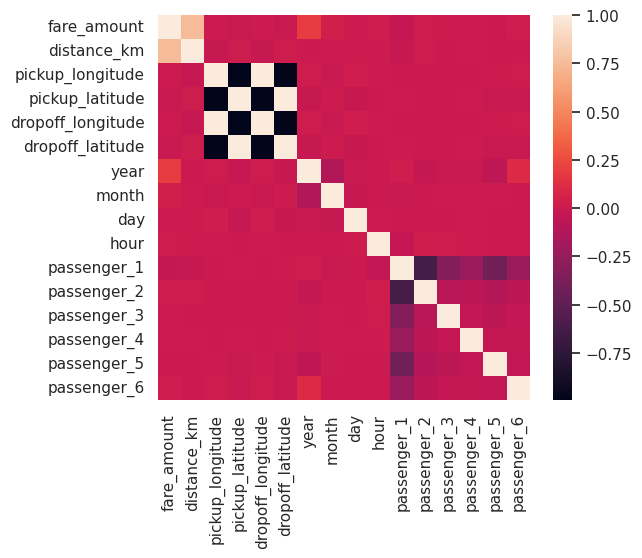

In [109]:
plt.figure(figsize=(6,5))
sns.heatmap(uber_corr)

Ignoring the direct relationships between, the `latitudes` `longitudes` and `passenge_number`, which are naturally corelating. It's evident that the only other notable corelaion is between `fare_amount` and `distance_km`

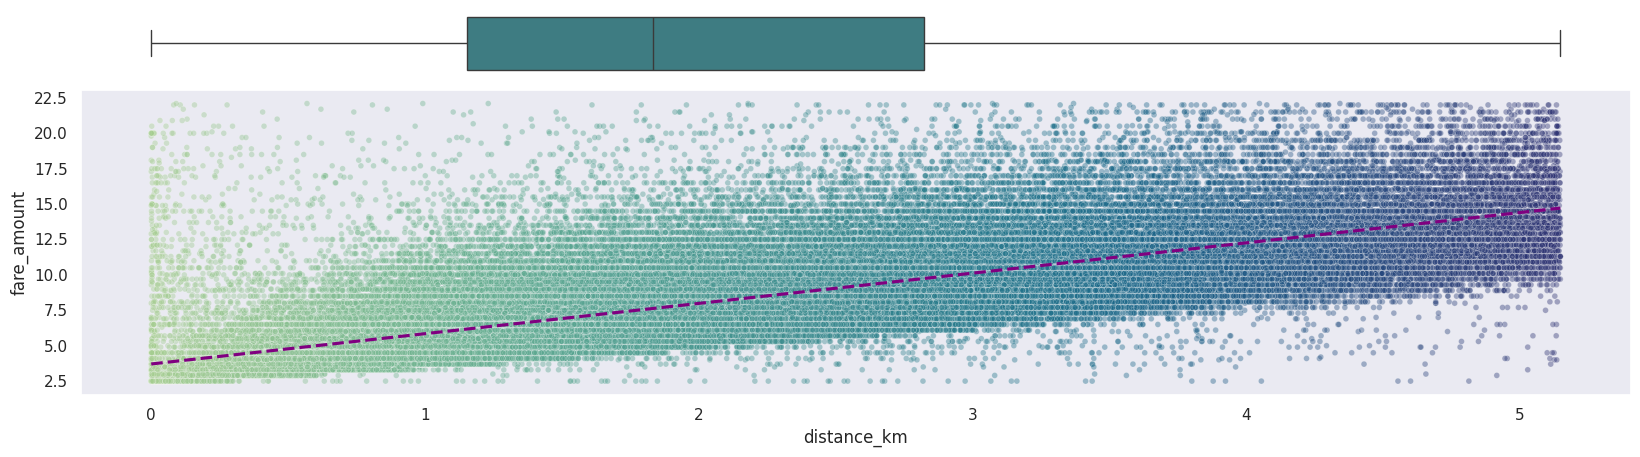

<Figure size 1500x1500 with 0 Axes>

In [112]:
fig, ax = plt.subplot_mosaic([['0', '0', '0'],
                               ['1', '1', '1'],
                               ['1', '1', '1'],
                               ['1', '1', '1'],
                               ['1', '1', '1']])

plt.figure(figsize=(15, 15))
sns.scatterplot(ax=ax['1'], data=uber, x='distance_km', y='fare_amount', hue='distance_km', 
                palette='crest', alpha=0.4, size=0.5)
sns.boxplot(ax=ax['0'], data=uber, x='distance_km', palette='crest')

#regression line
sns.regplot(ax=ax['1'], data=uber, x='distance_km', y='fare_amount', scatter=False, color='purple', line_kws={'linestyle':'--'})

ax['0'].set_axis_off()
ax['1'].get_legend().remove()

In [113]:
np.polyfit(uber['distance_km'], uber['fare_amount'], 1)

array([2.13831717, 3.70939467])

<h5 style="text-align: center">Positive corelation between Fare Amount & Distance (km) following:</h5>

$$fare\_amount = 2.14 \cdot distance\_km + 3.71$$



---